In [259]:
import matplotlib.pyplot as plt
import numpy as np

Applying line by line Barplots 

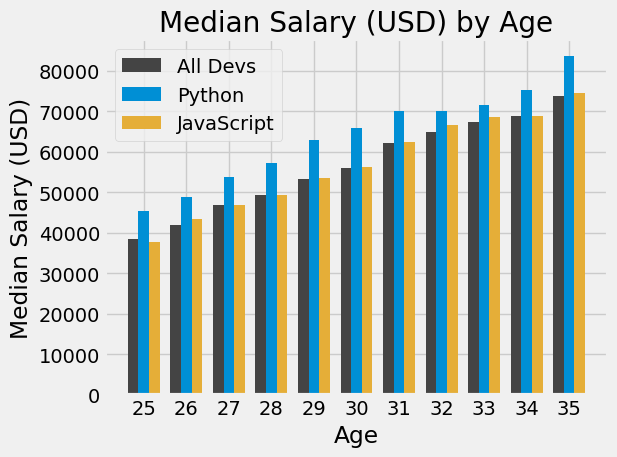

In [260]:
ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]

py_dev_y = [45372, 48876, 53850, 57287, 63016,
            65998, 70003, 70000, 71496, 75370, 83640]

js_dev_y = [37810, 43515, 46823, 49293, 53437,
            56373, 62375, 66674, 68745, 68746, 74583]

x_indexes = np.arange(len(ages_x))
# Using numpy to create a list with the same length of ages_x

width = 0.25
# Set bin width according to the number of x

plt.bar(x_indexes - width, dev_y, width = width, color = "#444444", label = "All Devs")
plt.bar(x_indexes, py_dev_y, width = width, color = "#008fd5", label = "Python")
plt.bar(x_indexes + width, js_dev_y, width = width, color = "#e5ae38", label = "JavaScript")

plt.legend()
plt.xlabel("Age")
plt.ylabel("Median Salary (USD)")
plt.title("Median Salary (USD) by Age")

plt.xticks(ticks = x_indexes, labels = ages_x)
# xticks allows you to set or modify the tick positions and their labels on the x-axis
plt.tight_layout()
plt.show()


Plot with real data

In [261]:
import pandas as pd
# Using pandas to take a peek at the data
df = pd.read_csv('assets/data/data.csv')
df.head(10)

,Responder_id,LanguagesWorkedWith
0,1,HTML/CSS;Java;JavaScript;Python
1,2,C++;HTML/CSS;Python
2,3,HTML/CSS
3,4,C;C++;C#;Python;SQL
4,5,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
5,6,Java;R;SQL
6,7,HTML/CSS;JavaScript
7,8,Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...
8,9,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...
9,10,C#;Go;JavaScript;Python;R;SQL


#### Using Counter as a container to draw graph

In [262]:
from collections import Counter
ids = df['Responder_id']
lang = df['LanguagesWorkedWith']
all_lang = []
for l in lang.dropna():
    all_lang.extend(l.split(';'))
counter = Counter(all_lang)
print(counter.most_common(10))

[('JavaScript', 59219), ('HTML/CSS', 55466), ('SQL', 47544), ('Python', 36443), ('Java', 35917), ('Bash/Shell/PowerShell', 31991), ('C#', 27097), ('PHP', 23030), ('C++', 20524), ('TypeScript', 18523)]


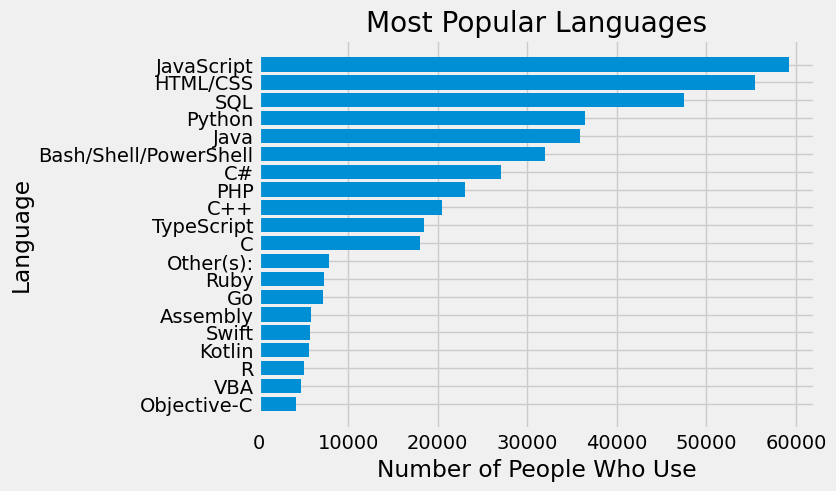

In [263]:
plot_lang = [lang for lang, freq in counter.most_common(20)]
plot_freq = [freq for lang, freq in counter.most_common(20)]
plt.barh(plot_lang[::-1], plot_freq[::-1])
plt.title('Most Popular Languages')
plt.xlabel('Number of People Who Use')
plt.ylabel('Language')
plt.style.use('fivethirtyeight')
plt.show()

#### I used real dataset from Stack-Overflow in which records the most popular programming language, I found this dataset on Kaggle, however it was two years ago. But we can still do a little bit explorations

In [264]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('assets/data/QueryResults.csv')
df.head(15)

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124
5,2008-08-01 00:00:00,perl,28
6,2008-08-01 00:00:00,c#,511
7,2008-08-01 00:00:00,c++,164
8,2008-08-01 00:00:00,java,222
9,2008-08-01 00:00:00,delphi,14


#### Rename, Reformat and Check the Data

In [265]:
print(df.head())
print('---')
print(df.tail())
print('---')
print(df.groupby('TagName').size())

                     m     TagName  Unnamed: 2
0  2008-07-01 00:00:00          c#           3
1  2008-08-01 00:00:00    assembly           8
2  2008-08-01 00:00:00  javascript         162
3  2008-08-01 00:00:00           c          85
4  2008-08-01 00:00:00      python         124
---
                        m TagName  Unnamed: 2
1986  2020-07-01 00:00:00       r        5694
1987  2020-07-01 00:00:00      go         743
1988  2020-07-01 00:00:00    ruby         775
1989  2020-07-01 00:00:00    perl         182
1990  2020-07-01 00:00:00   swift        3607
---
TagName
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64


#### Clean Data

1. Notice the first data row is 2008-07-01 and the date after all starts from 2008, so we can drop the `index = 0` row
2. Rename and Reformat the columns
3. `dropna`

In [266]:
df.drop(index = 0, inplace = True)
df.rename(columns = {'Unnamed: 2': 'Count', 'm': 'Date'}, inplace = True)
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d %H:%M:%S')
df = df.dropna(how = 'any')

Groupby(list) allow us to groupby twice, first groupby year, then by tagname

like in SQL
`GROUP BY Year, TagName`

In [267]:
df['Year'] = df['Date'].dt.year
df = df.groupby(['Year', 'TagName'])['Count'].sum().reset_index().sort_values(
    ['Year', 'Count'], 
    ascending = [True, False], 
    ignore_index = True)
print(df[df['Year'] == 2008])

    Year     TagName  Count
0   2008          c#   7476
1   2008        java   4302
2   2008         c++   3098
3   2008  javascript   2733
4   2008         php   2245
5   2008      python   2069
6   2008           c   1154
7   2008        ruby    933
8   2008        perl    517
9   2008      delphi    506
10  2008    assembly     86
11  2008           r      8


#### Preparation for the graph
In this case, I will use HeatMap, HeatMap requires a 2D array; so we will transform our dataframe into a pivot table(2D array)

In [268]:
table = df.pivot(index = 'TagName', columns = 'Year', values = 'Count')
table

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
TagName,,,,,,,,,,,,,
assembly,86.0,588.0,1326.0,2033.0,2866.0,3881.0,3936.0,4084.0,3974.0,3529.0,3186.0,3073.0,2290.0
c,1154.0,6765.0,15287.0,22598.0,31012.0,40680.0,41877.0,40107.0,34612.0,30649.0,25794.0,26445.0,19062.0
c#,7476.0,46028.0,75381.0,112868.0,138539.0,165500.0,163333.0,155069.0,149241.0,131877.0,109196.0,104547.0,64472.0
c++,3098.0,15684.0,31978.0,47979.0,63148.0,82227.0,82877.0,79920.0,71594.0,62128.0,52161.0,51565.0,39851.0
delphi,506.0,2681.0,3863.0,5397.0,5447.0,5871.0,5186.0,4650.0,3621.0,3089.0,2386.0,2091.0,1424.0
go,NaN,77.0,149.0,362.0,921.0,2096.0,3996.0,5166.0,6504.0,7072.0,7946.0,7868.0,5342.0
java,4302.0,23944.0,54389.0,99001.0,144780.0,191066.0,217937.0,215682.0,197093.0,174731.0,146300.0,134975.0,92203.0
javascript,2733.0,18722.0,43430.0,89978.0,136321.0,196116.0,236424.0,256075.0,264422.0,250318.0,209053.0,199420.0,153498.0
perl,517.0,2684.0,5015.0,6761.0,7788.0,9911.0,9003.0,6688.0,5472.0,4162.0,3072.0,2774.0,1439.0


### Why there is no Rust??

In [269]:
df[df['TagName'] == 'Rust']

,Year,TagName,Count


#### Whatever, keep drawing the heatmap, first normalize data so that each row can be traced as trend.

In [270]:
row_norm = table.div(table.max(axis = 1), axis = 0)
row_norm

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
TagName,,,,,,,,,,,,,
assembly,0.021058,0.143976,0.324682,0.497796,0.701763,0.950294,0.963761,1.000000,0.973066,0.864104,0.780118,0.752449,0.560725
c,0.027557,0.161545,0.365045,0.539628,0.740550,0.971416,1.000000,0.957733,0.826516,0.731881,0.615947,0.631492,0.455190
c#,0.045172,0.278115,0.455474,0.681982,0.837094,1.000000,0.986906,0.936973,0.901758,0.796840,0.659795,0.631704,0.389559
c++,0.037381,0.189244,0.385849,0.578918,0.761948,0.992157,1.000000,0.964321,0.863858,0.749641,0.629378,0.622187,0.480845
delphi,0.086186,0.456651,0.657980,0.919264,0.927781,1.000000,0.883325,0.792029,0.616760,0.526145,0.406404,0.356157,0.242548
go,NaN,0.009690,0.018752,0.045558,0.115907,0.263781,0.502895,0.650138,0.818525,0.890008,1.000000,0.990184,0.672288
java,0.019740,0.109867,0.249563,0.454264,0.664320,0.876703,1.000000,0.989653,0.904358,0.801750,0.671295,0.619330,0.423072
javascript,0.010336,0.070803,0.164245,0.340282,0.515543,0.741678,0.894116,0.968433,1.000000,0.946661,0.790604,0.754173,0.580504
perl,0.052164,0.270810,0.506003,0.682171,0.785794,1.000000,0.908385,0.674806,0.552114,0.419937,0.309959,0.279891,0.145192


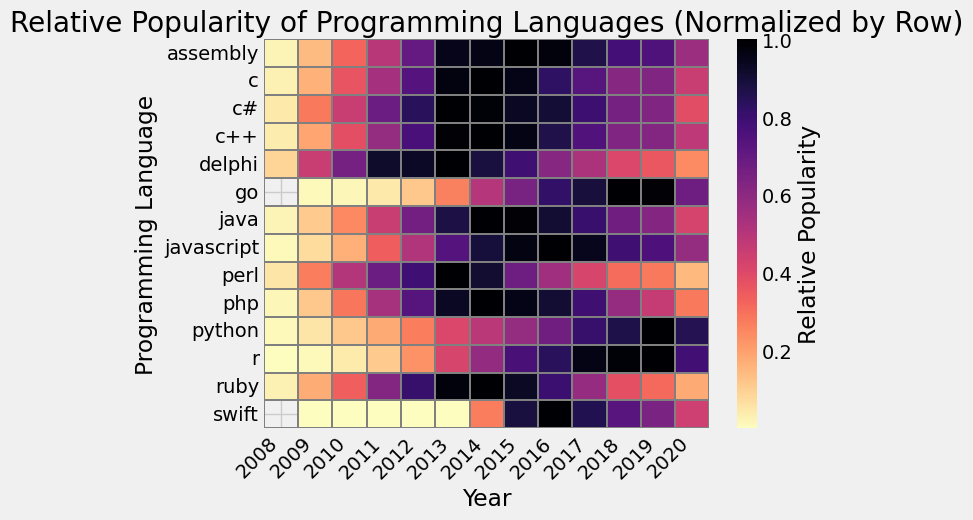

In [271]:
sns.heatmap(
    row_norm,                
    cmap="magma_r",         
    linewidths=0.3,          
    linecolor='gray',        
    cbar_kws={'label': 'Relative Popularity'}
)
plt.xticks(rotation = 45, ha = 'right')
plt.title("Relative Popularity of Programming Languages (Normalized by Row)")
plt.xlabel("Year")
plt.ylabel("Programming Language")
plt.show()